# Introduction to Visualzing Data with Python

This assignment will serve as a self-guided tour of major plotting libraries of Python. Major plotting libraries are listed below. You can find a more complete list [here](https://wiki.python.org/moin/NumericAndScientific/Plotting).

+ `Matplotlib`
+ `Bokeh`
+ `Seaborn`

## Learning Goals

1. Tour of plotting with the python package `Matplotlib`.
    1. `Pyplot` API vs Object Oriented approach.
    1. Line plots.
    1. Scatter plots.
    1. Histograms.
2. Tour of `seaborn`. 
3. Tour of `Bokeh`.
    1. Basic interactive plots.
    1. Hover tools.

### Prepare Notebook

In [2]:
# Import scientific packages.
import numpy as np
import pandas as pd
import seaborn as sns

# Import plotting libraries.
import matplotlib
import matplotlib.pyplot as plt
# Import matplotlib into the notebooks namespace.

# Use jupyter notebooks inline function to simplify plot display.
# For interactive plots within Jupyter Notebooks.
# %matplotlib notebook

# For static plots.
%matplotlib inline   

## Line Plots

Line plots are among the simplest we can make, and will serve as our introduction to the API of `matplotlib`.

### The Matplotlib API

https://matplotlib.org/api/index.html

This API is good for simple applications. For more interesting
work we need to use the object oriented approach.

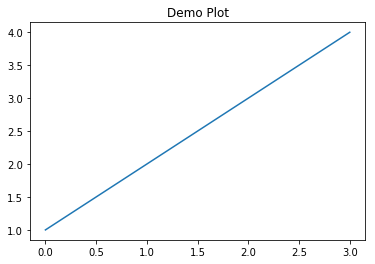

In [3]:
plt.plot([1,2,3,4])
plt.title('Demo Plot')
plt.show()

Something confusing has happened above. Despite giving only one dimension of data, the plot is shown with two! This is a feature of matplotlib. Per the documentation:

>You may be wondering why the x-axis ranges from 0-3 and the y-axis from 1-4. If you provide a single list or array to the `plot(`) command, matplotlib assumes it is a sequence of y values, and automatically generates the x values for you. Since python ranges start with 0, the default x vector has the same length as y but starts with 0. Hence the x data are `[0,1,2,3]`.

To plot x versus y, simply give two arguments.

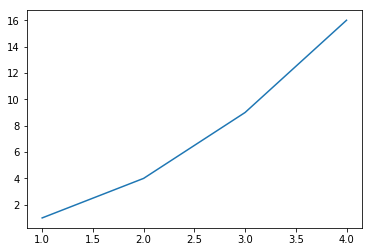

In [4]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
plt.show()

Valid calls to `plt.plot()` include:

```python
plt.plot(x, y)        # plot x and y using default line style and color
plt.plot(x, y, 'bo')  # plot x and y using blue circle markers
plt.plot(y)           # plot y using x as index array 0..N-1
plt.plot(y, 'r+')     # ditto, but with red plusses
```

See the [documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) of `plt.plot()`. 

# Scatter Plots

I will introduce some boiler plate code here for interacting with `matplotlib`. As you can see from the first few examples, you do not always need to be this explicit, but there is no harm in doing so and it allows for more controll over the plots you create.

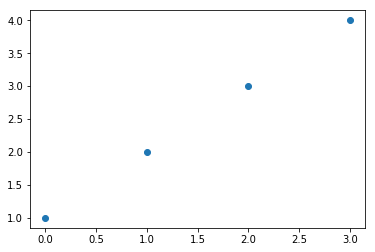

In [12]:
# Create a figure.
fig = plt.figure()

# Add `subplot` or `axis` to the figure.
# In the current figure, create and return an Axes, at position index of 
# a (virtual) grid of nrows by ncols axes. Indexes go from 1 to nrows * ncols, 
# incrementing in row-major order.
ax = fig.add_subplot(1, 1, 1)

# Use this created axis to plot the same data.
ax.plot([1,2,3,4], 'o')

plt.show()

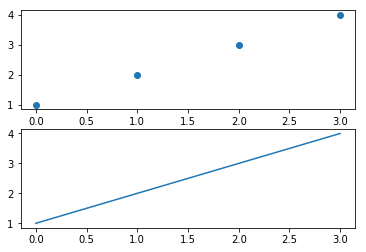

In [25]:
# Create a figure.
fig = plt.figure()

# Add `subplot` or `axis` to the figure.
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

# Use this created axis to plot the same data.
ax1.plot([1,2,3,4], 'o')
ax2.plot([1,2,3,4])

plt.show()

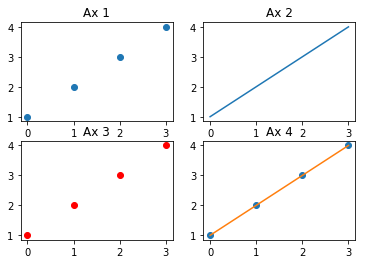

In [46]:
# Create a figure.
fig = plt.figure()

# Add `subplot` or `axis` to the figure.
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

# Use this created axis to plot the same data.
ax1.plot([1,2,3,4], 'o')
ax1.set_title('Ax 1')

ax2.plot([1,2,3,4])
ax2.set_title('Ax 2')

ax3.plot([1,2,3,4], 'ro')
ax3.set_title('Ax 3')

ax4.set_title('Ax 4')
ax4.plot([1,2,3,4], 'o')
ax4.plot([1,2,3,4])

plt.show()

# Assignment Part

1. Recreate the above plots in the **Scatter Plot** section using another dimension of data, ie. assign explicit x values to those plots instead of allowing them to be autogenerated. 

In [47]:
# Single plot.

In [48]:
# Double plot.

In [49]:
# Quad plot.

# Histograms

## Random Distribution Generation

Build some data for the rest of the plots.

In [ ]:
# This sets the seed for the random 
np.random.seed(42)

mu = 100  # mean of distribution
sigma = 15  # standard deviation of distribution
x = mu + sigma * np.random.randn(500)

#### Examine Data Directory

In [5]:
ls data

2014-baby-names-illinois.csv  billboard.csv  tb-raw.csv       weather.txt
2015-baby-names-illinois.csv  pew-raw.csv    weather-raw.csv


In [8]:
baby_names_14 = pd.read_csv('data/2014-baby-names-illinois.csv')
baby_names_14.head()

,rank,name,frequency,sex
0,1,Noah,837,Male
1,2,Alexander,747,Male
2,3,William,687,Male
3,4,Michael,680,Male
4,5,Liam,670,Male


## Define a function

### Boltzmann Probability Distribution

You have surely seen this before. Let us import our Python
packages and plot it to get ready.

$$
P(\alpha) = e^{\frac{-E(\alpha)}{kT}}
$$

In [11]:
def calc_Boltz_Dist_Prob(energy, temperature, k=1.0):
    """Returns the probability of a given energy. This function
    defaults to a unitless output."""
    return np.exp(-energy / (k * temperature))

In [12]:
# Create ranges of temperature and energy.
temp_range = np.arange(0.1, 100)
energy_range = np.arange(0.1, 100)

## Plot the function

Since this function has two variables let us keep one of them constant.

In [13]:
plt.plot(calc_Boltz_Dist_Prob(500, temp_range))
plt.title('Constant Energy v Temperature')
plt.ylabel('Probability')
plt.xlabel('Temperature')
plt.show()

## Exponential decay function
The reaction we are modeling is one species decaying into another:

$$ A \xrightarrow{c} B $$

$A$ is the starting material, and $B$ is the decay product. $c$ is the rate constant, in whatever units of time we would like.

The reason we do this is this system is simple enough that it can be solved exactly, and we can check our work. The simple equations that turn out to model exponential decay are:

$$X(t) = X_0e^{-ct}$$

In python:

In [14]:
def exponential_decay(X, c, t):
    # np.exp is e raised to the arguments within ()
    return X * np.exp(-c * t)

In [15]:
# first we need a time range for the plot.
# np.linspace(a,b,c) creates a range from a to b, with c points in it.
time_range = np.linspace(0, 10, 1000)

# assing an alias to the exponential decay function.
exp = exponential_decay(1000, 0.5, time_range)

# declare the figure number and size
plt.figure(1, figsize=(5,5))

# set the x axis limit, this is our time axis.
# time_range[-1] returns the last value in the time_range line space.
plt.xlim(0, time_range[-1])

# set the y axix limit, this is our decaying species # axis
plt.ylim(0, 1100)

# set the title.
plt.title("Exponential Decay")

# ceate a plot, other Python implementations may require plt.show() as well.
plt.plot(time_range, exp, 'b', linewidth=1.5)

# plt.savefig('exp_decay.svg')
plt.show()

### Scatter Plot Demo

In [16]:
plt.scatter(temp_range, calc_Boltz_Dist_Prob(500, temp_range))
plt.title('Constant Energy v Temperature')
plt.ylabel('Probability')
plt.xlabel('Temperature')
plt.show()

## Adding dimensions

In [17]:
# Create ranges of temperature and energy.
temp_range = np.arange(0.1, 100)
energy_range = np.arange(0.1, 100)

# Create a mesh grid of these points so that we can
# visualize this function in three dimensions.
temp_mesh, energy_mesh = np.meshgrid(temp_range, energy_range)

# Calculate the Boltzmann Mesh
boltz_mesh = calc_Boltz_Dist_Prob(temp_mesh, energy_mesh)

### Plot the Boltzmann Distribution

In [11]:
fig, ax = plt.subplots(1,1)
ax.set_xlabel('Temperature')
ax.set_ylabel('Energy')
plt.imshow(boltz_mesh, interpolation='nearest')
plt.show()

<IPython.core.display.Javascript object>

In [14]:
# import a 3d axis toolkit.
from mpl_toolkits.mplot3d import Axes3D

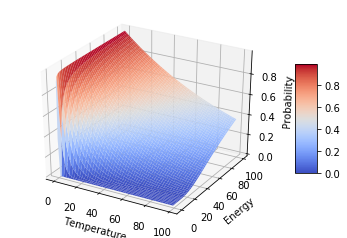

In [15]:
fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(
    temp_mesh, 
    energy_mesh, 
    boltz_mesh,
    cmap=matplotlib.cm.coolwarm,
)

ax.set_xlabel('Temperature')
ax.set_ylabel('Energy')
ax.set_zlabel('Probability')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

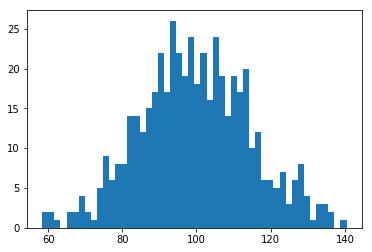

In [19]:
np.random.seed(0)

# example data
mu = 100  # mean of distribution
sigma = 15  # standard deviation of distribution
x = mu + sigma * np.random.randn(500)

num_bins = 50

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins)